# Reinforced Anytime Bottom Up Rule Learning for Knowledge Graph Completion

## 2 Bottom Up Rule Learning

Trước tiên, chúng tôi giới thiệu loại quy tắc mà **AnyBURL** có thể học được trước khi chúng tôi mô tả cách chúng tôi tạo các quy tắc này từ các đường dẫn lấy mẫu. Các phần của điều này đã được trình bày dưới dạng khác trong [16]. Sau đó, chúng tôi giải thích khái niệm **Object Identity** (Nhận dạng đối tượng) đã được giới thiệu trong [25] và tranh luận lý do tại sao nó quan trọng đối với trường hợp sử dụng của chúng tôi. **Object Identity** đã được triển khai một phần trong phiên bản trước của **AnyBURL** mà không hiểu tầm quan trọng của nó.

### 2.1 Language Bias

Chúng tôi phân biệt dưới đây giữa ba loại quy tắc mà chúng tôi gọi là:
* ***binary rules*** $B$ quy tắc nhị phân
* quy tắc đơn nguyên kết thúc bằng một **dangling atom** nguyên tử lơ lửng $U_d$
* quy tắc đơn nguyên kết thúc bằng một **atom** (nguyên tử) bao gồm hằng số $U_c$

$$
\begin{matrix}
  B & ~ & h(A_0,A_n) \gets 	\bigwedge^n_{i=1} b_i(A_{i-1}, A_i) \\
  U_d & ~ & h(A_0,c) \gets  \bigwedge^n_{i=1} b_i(A_{i-1}, A_i) \\
  U_c & ~ & h(A_0,c) \gets  \bigwedge^{n-1}_{i=1} b_i(A_{i-1}, A_i) \wedge b_n(A_{n-1}, c^{\prime})
 \end{matrix}
 $$

Trái ngược với quy tắc nhị phân, **head atom**(nguyên tử đầu) trong quy tắc đơn nguyên chứa một hằng số và chỉ một thay vì hai biến. Một biểu thức như vậy cũng có thể được hiểu là một cách phức tạp để viết ra một vị ngữ đơn nguyên, đó là lý do để đặt tên cho các quy tắc này quy tắc đơn nguyên. Ví dụ điển hình là các nguyên tử đầu như *gender(X, female)*  hoặc *citizen(X,spain)*.

Chúng tôi gọi các quy tắc của các loại này là **path rules**(quy tắc đường dẫn), bởi vì các ***body atoms*** (phần  sau đấu $\gets$) tạo thành một đường dẫn **path**. Lưu ý rằng xu hướng ngôn ngữ của chúng tôi cũng bao gồm các biến thể quy tắc với các biến được đảo ngược trong các nguyên tử: được đưa ra đồ thị tri thức $G$, đường dẫn có độ dài $n$ là một chuỗi gồm ba bộ ba $p_i (c_i, c_i + 1)$ với $pi (c_i, c_i + 1) \in G$ hoặc $p_i (c_i + 1, c_i) \in G$ với $0 \geq i \leq n$. Các ***abstract rule patterns*** (mẫu quy tắc trừu tượng) được hiển thị ở trên được cho là có độ dài $n$ vì ***body atoms*** của chúng có thể được khởi tạo thành một đường dẫn có độ dài $n$. Thay vì $A_i$ đôi khi chúng ta sẽ sử dụng $A, B, C, \dots$ làm tên cho các biến. Hơn nữa, chúng ta thường sẽ thay thế các biến xuất hiện trong đầu bằng $X$ cho chủ thể và $Y$ cho đối tượng.

Quy tắc $B$ và quy tắc $U_c$ cũng được gọi là quy tắc kết nối kín. Chúng có thể được học bởi hệ thống khai thác AMIE được mô tả trong [11, 10]. Quy tắc $U_d$ không được đóng vì $A_n$ là biến chỉ xuất hiện một lần.

Ví dụ cho quy tắc nhị phân là Quy tắc (1) và (2) được hiển thị bên dưới. Họ mô tả mối quan hệ giữa $X$ và $Y$ thông qua một đường dẫn khác giữa $X$ và $Y$. Đường dẫn này có thể chứa một mối quan hệ duy nhất hoặc một chuỗi các mối quan hệ. Chúng tôi cho phép các quy tắc đệ quy, tức là, mối quan hệ trong **head** có thể xuất hiện một hoặc nhiều lần trong **body** như trong Quy tắc (2).

Quy tắc (3) là quy tắc $U_c$ quy định rằng một người là nữ, nếu cô ấy kết hôn với một người là nam.

Một ví dụ điển hình cho quy tắc $U_d$ là Quy tắc (4), trong đó nói rằng một diễn viên là điễn viên phim hành động người hành động (trong phim).

$$
\begin{matrix}
\textit{hypernym}(X, Y ) \gets \textit{hyponym}(Y, X) & \quad (1) \\
prod(X, Y ) \gets prod(X, A),sequel(A, Y )  & \quad  (2) \\
gen(X, female) \gets married(X, A), gen(A, male)  & \quad  (3) \\
prof(X, actor) \gets actedin(X, A)  & \quad (4)
\end{matrix}
$$

Tất cả các quy tắc được xem xét là xác suất có nghĩa là chúng được chú thích với điểm tin cậy thể hiện xác suất dự đoán một thực tế chính xác với quy tắc này. Tỷ lệ ***body groundings*** dẫn đến nối **head grounding** chính xác (được đo trên dữ liệu huấn luyện) được gọi là độ tin cậy của quy tắc. Điều quan trọng là phải hiểu mối quan hệ giữa ba loại quy tắc. Nó đặc biệt thú vị trong bối cảnh của các quy tắc xác suất. Với mục đích đó, hãy xem xét bộ quy tắc sau (điểm tin cậy giả tưởng được thêm vào dấu ngoặc vuông).

$$
\begin{matrix}
    speaks(X, Y ) \gets lives(X, A), lang(Y, A) & [0.8]  & \quad (5) \\
    speaks(X, english) \gets lives(X, A)        & [0.62] & \quad (6) \\
    speaks(X, french) \gets lives(X, france)    & [0.88] & \quad (7) \\
    speaks(X, german) \gets lives(X, germany)   & [0.95] & \quad (8) \\
\end{matrix}
$$

Xem xét quan hệ $lives(A, B)$ được sử dụng để nói rằng một người $A$ sống ở quốc gia $B$ và $lang(A, B)$ được sử dụng để nói rằng $A$ là (một trong) ngôn ngữ chính thức của $B$. Do đó, Quy tắc $B(5)$ nói rằng $X$ nói một ngôn ngữ $Y$ nhất định, nếu $X$ sống ở một quốc gia $A$ trong đó $Y$ là ngôn ngữ chính thức.

$U_d$ $Rule (6)$ là một *specialization* (chuyên môn hóa) để dự đoán người nói tiếng Anh

và các quy tắc $U_c$ còn lại liên quan đến một ngôn ngữ cụ thể đến một quốc gia cụ thể. 

Khía cạnh thú vị của bộ quy tắc này là thực tế rằng Quy tắc (6) có thể được tạo ra từ Quy tắc (5) bằng cách loại bỏ **Atom** thứ hai trong **body** và bằng cách thay $Y$ vào $head$.


Tương tự, Quy tắc (7) và (8) có thể được xây dựng bằng cách thay hằng bằng $A$. Có vẻ như chúng ta không cần các biến thể quy tắc chuyên biệt này, nếu chúng ta đã có quy tắc chung hơn. Tuy nhiên, điều này là sai vì hai lý do: 
* (i) có thể là trường hợp đồ thị tri thức đã cho không chứa thông tin về các ngôn ngữ chính thức của **Pháp** hoặc **Đức**; 
* và (ii) các confidences-(độ tinh cậy) của các quy tắc cụ thể (6) - (8) khác với độ tinh cậy của các quy tắc chung hơn. Độ tin cậy của một quy tắc chung có liên quan chặt chẽ với mức trung bình (có trọng số) so với confidences-(độ tinh cậy) cụ thể (ví dụ: bằng cách tổng hợp trên tất cả các quốc gia và ngôn ngữ). Vì lý do đó, cần phải tạo cả hai loại quy tắc, mặc dù chúng có thể mang thông tin dư thừa một phần.

## 2.2 Sampling Rules

Chúng tôi đề xuất một cách **bottom-up approach** (tiếp cận từ dưới lên) để học các quy tắc từ các **bottom rules** (quy tắc dưới cùng), tức là các quy tắc có căn cứ từ các **paths** (đường dẫn) được lấy mẫu trong đồ thị tri thức. Nó được chia thành các bước sau:

1.  Lấy mẫu một đường dẫn từ một đồ thị kiến thức nhất định. 
2.  Xây dựng **bottom rule** từ đường dẫn được lấy mẫu. 
3.  Xây dựng một *generalization lattice* (mạng tổng quát) bắt nguồn từ quy tắc dưới cùng. 
4.  Lưu trữ tất cả các quy tắc hữu ích xuất hiện trong mạng.

Bản phác thảo ở trên về cách tiếp cận của chúng tôi nhắc nhở thuật toán được triển khai trong [Aleph 26]. Tuy nhiên, **Aleph** sử dụng *bottom rule* để xác định ranh giới của *top-down search*. Nó bắt đầu với *general rule* (quy tắc chung nhất) và sử dụng các **atoms** (nguyên tử) xuất hiện trong **bottom rule** để tạo ra một **specialization lattice** (mạng tinh thể hóa). Tương tự, **AMIE** cũng thực hiện * top-down search* (tìm kiếm từ trên xuống), trái ngược với **Aleph** là hoàn thành vì nó không giới hạn *atoms** (các nguyên tử) nào được sử dụng để chuyên môn hóa một quy tắc. Cách tiếp cận của chúng tôi khác về cơ bản với cả hai thuật toán bởi vì chúng tôi tạo ra một mạng tổng quát bắt đầu từ **bottom rule** (quy tắc dưới cùng). Chúng tôi lập luận sau đây rằng tất cả các quy tắc có liên quan trong mạng tổng quát hóa khởi tạo một trong các loại quy tắc được xác định trong phần trước. Dựa trên cái nhìn sâu sắc này, chúng ta có thể khởi tạo trực tiếp các loại quy tắc này mà không cần phải tạo mạng hoàn chỉnh.

Để tìm các quy tắc cho một mối quan hệ cố định, **AnyBURL** lấy mẫu nhiều lần của mối quan hệ đó từ tập huấn luyện và mỗi lần tạo ra các quy tắc từ nó. Hình 1 cho thấy một tập hợp con nhỏ của đồ thị tri thức $G$. Chúng tôi sử dụng nó để chứng minh các quy tắc cho mối quan hệ $speaks$ sẽ được học từ nó như thế nào. Chúng tôi xây dựng các quy tắc dưới cùng của chiều dài $n$, bắt đầu từ $speaks (ed, d)$ (Ed nói tiếng Hà Lan), sẽ là kết luận (**head atom**) các quy tắc. Để làm điều này, chúng tôi ngẫu nhiên đi duyệt $n$ bước trong đồ thị, bắt đầu từ $ed$ hoặc $d$. Cùng với **head triple** (bộ ba đầu), kết quả là một đường dẫn có độ dài $n + 1$. Chúng tôi đã đánh dấu ba đường dẫn trong Hình 1 có thể được tìm thấy cho $n = 2$ hoặc $n = 1$, tương ứng. Các đường dẫn màu xanh lá cây và màu xanh là không có chu trình, trong khi đường dẫn màu đỏ, bao gồm $speaks(ed, d)$ là có chu trình. Chúng tôi chuyển đổi các đường dẫn này thành các quy tắc dưới cùng (9), (10) và (11).

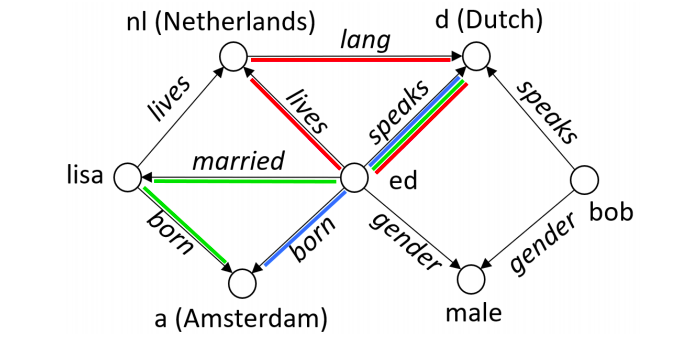

In [2]:
from IPython.display import Image
Image(filename='../../images/R-AnyBURL-fig1.png')

Hình 1: Một đồ thị tri thức $G$ được sử dụng cho các *sampling paths*. Chúng tôi đã đánh dấu đường dẫn tương ứng với Quy tắc 9 màu xanh lam, Quy tắc 10 màu xanh lá cây và Quy tắc 11 màu đỏ.

$$
\begin{matrix}
speaks(ed, d) \gets born(ed, a)                  & \quad (9) \\
speaks(ed, d) \gets mar(ed, lisa), born(lisa, a) & \quad (10) \\
speaks(ed, d) \gets lives(ed, nl), lang(nl, d)   & \quad (11)
\end{matrix}
$$

Chúng tôi lập luận rằng mọi khái quát về đường dẫn có độ dài $n + 1$ sẽ là quy tắc $B$, $U_c$ hoặc $U_d$ có độ dài $n$ hoặc quy tắc ngắn hơn, có thể được xây dựng từ một đường dẫn ngắn hơn hoặc quy tắc không hữu ích để đưa ra dự đoán . Chúng tôi xây dựng điểm này bằng cách phân tích mạng tổng quát bắt nguồn từ Quy tắc (10), được mô tả trong Hình 2.

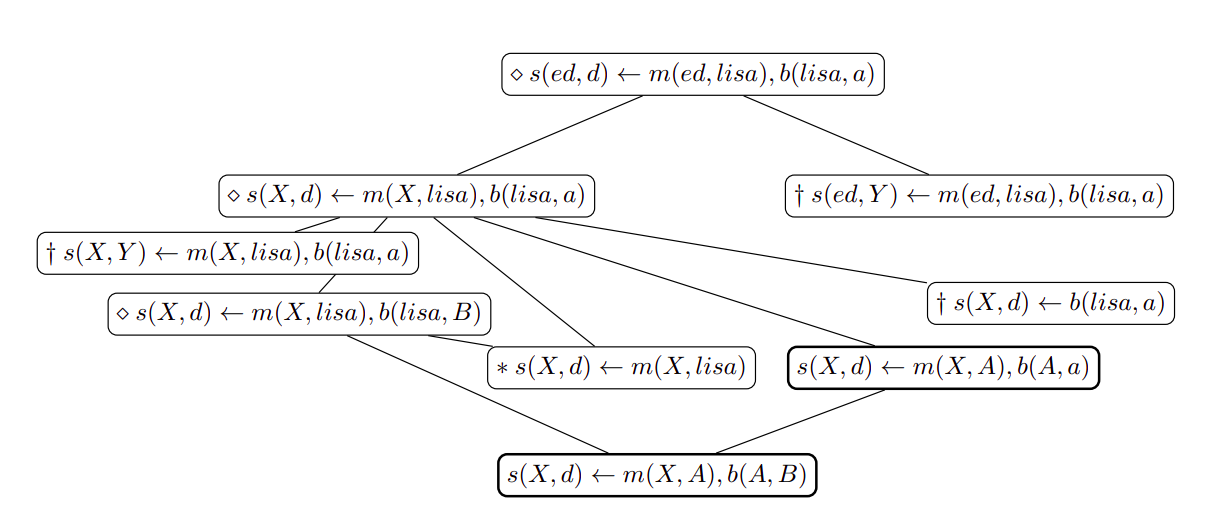

In [4]:
from IPython.display import Image
Image(filename='../../images/R-AnyBURL-fig-2.png')

Hình 2: Mạng tổng quát của đường đi acyclic $(s(ed, d), m(ed, lisa), born(lisa, a))$. Để dễ đọc, chúng tôi sử dụng các chữ viết tắt $s = speaks$, $m = married$ và $b = born$.

Mỗi cạnh trong quá trình chuyển đổi mạng bắt nguồn từ một trong hai hoạt động khái quát hóa sau đây. 

* (i) Thay thế tất cả các lần xuất hiện của một hằng số bằng một biến mới. 
* (ii) Drop một trong các *Atom* trong **nody**. Lưu ý rằng chúng ta chỉ mô tả các quy tắc đó trong mạng có ít nhất một biến trong **head**. Nếu đây không phải là trường hợp, quy tắc sẽ chỉ dự đoán một bộ ba đã được nêu trong đồ thị kiến thức, điều này là vô ích để hoàn thành. Một quy tắc xuất hiện trong mạng rơi vào một trong các loại sau. Chúng tôi đã liên kết các ký hiệu $\dagger, \ \ast, \ \diamond$, và với từng loại và sử dụng chúng để đánh dấu các node trong Hình 2.

***Ambiguous prediction*** $\dagger$ (dự đoán mơ hồ)

Quy tắc có một biến không được kết nối trong $head$, không xuất hiện trong $body$ của quy tắc (ví dụ quy tắc bên phải $s(ed, Y))$ không có sự kết nối). Quy tắc như vậy đưa ra một dự đoán rằng một cái gì đó tồn tại, tuy nhiên, nó không đưa ra một dự đoán cụ thể sẽ được yêu cầu để tạo ra một thứ hạng của các ứng cử viên

***Shorter bottom rule*** $\ast$

Quy tắc có thể hữu ích nhưng nó cũng sẽ xuất hiện trong mạng của **bottom rule** bắt nguồn từ một đường dẫn ngắn hơn. Để tránh các quy tắc trùng lặp, chúng tôi không tạo ra nó từ **bottom rule** dài hơn. Điểm này được chi tiết trong Phần 3.

***Useless atom*** $\diamond$

*body* chứa một *atom* không có biến hoặc một n*atom* có biến không đổi và không có biến. Các nguyên tử như vậy sẽ luôn đúng trong đồ thị tri thức mà chúng được lấy mẫu và do đó không ảnh hưởng đến giá trị thật của cơ thể.

Lưu ý rằng một quy tắc trong mạng được đánh dấu bằng $\dagger$ hoặc $\ast$ không cần phải khái quát thêm nữa, bởi vì bất kỳ quy tắc kết quả nào sẽ được đánh dấu lại với cùng một ký hiệu.

Khi chúng ta áp dụng sơ đồ chú thích này cho mạng tinh thể (Hình 2) bắt nguồn từ **acyclic path** màu xanh lá cây (trong Hình 1), chỉ có hai quy tắc không được đánh dấu. Chúng tôi đã làm nổi bật các quy tắc này với một hình chữ nhật đậm. Hai quy tắc này thuộc loại $U_d$ và $U_c$. Người ta có thể dễ dàng lập luận rằng điều này sẽ luôn là kết quả khi chúng ta khái quát một quy tắc dưới cùng bắt nguồn từ một **acyclic path**. Do đó, chúng ta không cần tìm kiếm trên mạng tổng quát mà có thể trực tiếp tạo hai quy tắc này từ một đường dẫn **acyclic path**.

Chúng ta có thể quan sát một mô hình tương tự khi chúng ta khái quát một **acyclic path**. Nó dẫn đến ba quy tắc mà chúng ta có thể tận dụng để dự đoán; một quy tắc $B$ và hai quy tắc $U_c$, trong đó hằng số đầu (*subject/object*) xuất hiện lại trong **body atom**.

## 2.3 Object Identity

Nhận dạng đối tượng (OI) đề cập đến một *framework* yêu cầu diễn giải mọi quy tắc theo giả định bổ sung rằng hai thuật ngữ khác nhau (biến hoặc hằng) xuất hiện trong quy tắc phải tham chiếu đến các thực thể khác nhau. Điều này có nghĩa là mỗi quy tắc được mở rộng bằng một tập các ràng buộc bất đẳng thức hoàn chỉnh theo cặp. OI lần đầu tiên được giới thiệu trong [25] và sau đó nó được sử dụng để đề xuất các toán tử tinh chỉnh cho *framework* ban đầu [9]. Trong công việc này, chúng tôi không tập trung vào các tính chất lý thuyết của nó mà về tác động của nó trong việc sửa điểm tin cậy của các quy tắc đã học.

Trong bối cảnh tiếp cận của chúng tôi, thuộc tính quan trọng nhất của OI là khả năng ngăn chặn các quy tắc dư thừa ảnh hưởng tiêu cực đến hiệu suất theo $\Theta - subsumption $ [22]. Chúng tôi minh họa hiệu ứng với hai quy tắc sau ($h$ và $b$ là hai quan hệ tùy ý nhưng cố định)

$
\begin{matrix}
h(X, Y ) \gets h(X, Y ) & \quad (12) \\
h(X, Y ) \gets b(X, A), b(B, A), h(B, Y ) & \quad (13)
\end{matrix}
$

Giải thích các quy tắc theo OI có thể được thực hiện bằng cách thêm các ràng buộc bổ sung cho các quy tắc. Chẳng hạn, phần thân của Quy tắc (13) sẽ cần được mở rộng với các ràng buộc bất đẳng thức (14).

$X \ne A,\ X \ne B,\ X \ne Y,\ A \ne B,\ A \ne Y,\ B \ne Y \ \ \ \ \ \ (14)$

Mỗi quy tắc được xây dựng bởi **AnyBURL** luôn được diễn giải theo OI. Lưu ý rằng các ràng buộc bất đẳng thức này không được hiển thị bất cứ khi nào một quy tắc được hiển thị hoặc được lưu trữ trong một tệp.

Quy tắc (12) rõ ràng là một $tautology$ **1 điều hiển nhiên** sẽ không bao giờ tạo ra bất kỳ *fact* mới. Điều này chỉ đúng một phần cho Quy tắc (13). Các **groundings** (nền tảng) của body của nó có thể được chia thành các **groundings** $\theta$ với $B = X$ và các **groundings** $\theta^{\prime}$ với $B \ne X$. Ngược lại với $\theta^{\prime}$ **groundings**, $\theta$ **groundings**(căn cứ) không dự đoán *new facts* và cũng có nhiều khả năng hơn dẫn đến một **true body** bởi vì cả hai **atoms**(nguyên tử) của mối quan hệ $b$ có thể là nền tảng cho cùng một **fact**. Điều này có nghĩa là, không có $OI$, điểm tin cậy của Quy tắc (13) đánh giá quá cao chất lượng của nó vì nó sẽ luôn được sử dụng để dự đoán các **fact** chưa biết. Thêm các ràng buộc bất đẳng thức sẽ triệt tiêu các **groundings**(căn cứ) và dẫn đến điểm *confidence* thực tế hơn cho nhiệm vụ.

**A tautology is a formula which is "always true" --- that is, it is true for every assignment of truth values to its simple components. You can think of a tautology as a rule of logic.**
[tautology](http://sites.millersville.edu/bikenaga/math-proof/truth-tables/truth-tables.html#:~:text=A%20tautology%20is%20a%20formula,which%20is%20%22always%20false%22.)

Điều quan trọng là phải hiểu rằng nó không chỉ là các biến thể của quy tắc **tautology** có vấn đề này. Ví dụ: nếu có các quy tắc mạnh như $m(X, Y ) \gets spo(Y, X)$ (*m = married, spo = spouse*)trong biểu đồ tri thức, các quy tắc như sau cũng bị ảnh hưởng

$m(X, Y ) \gets son(X, A), son(B, A), spo(B, Y ) \ \ \ \ \ \ \ \ (15)$

Điểm tin cậy của một quy tắc như vậy giảm mạnh (và đúng) theo OI một khi chúng ta bỏ qua các căn cứ trong đó $X$ và $B$ là căn cứ cho cùng một con trai.

Mặc dù OI giúp chúng ta tránh được sự bùng nổ của *rule base*, một quy tắc nhất định khó đánh giá hơn theo OI (xem thêm §5.1.1 trong [5]). Điều này giữ cả cho tính toán **confidence** cũng như cho việc áp dụng quy tắc trong bối cảnh *predicting new knowledge* (dự đoán kiến thức mới). Nếu chúng ta bỏ qua các ràng buộc bất đẳng thức, tất cả các *groundings*(căn cứ) có thể $(X, Y)$ cho Quy tắc (13) có thể được tính bằng hai phép toán nối. Kết quả của phép nối đầu tiên, chúng ta có được các căn cứ cho $(X, B)$ có thể được sử dụng để tính toáncác căn cứ $(X, Y)$ thông qua phép nối thứ hai. Tuy nhiên, ràng buộc $A \ne Y$ yêu cầu phải biết các ràng buộc biến của $A$ mà chúng ta đã sử dụng cho phép nối thứ nhất khi thực hiện phép nối thứ hai để đảm bảo rằng ràng buộc đó không bị vi phạm. Theo dõi tất cả các ràng buộc biến làm cho nó phức tạp hơn để tính toán *groundings body* theo OI.

## 3  Search Strategy (Chiến lược tìm kiếm)
### 3.1 Path Sampling

### 3.2 Saturation based Search (Tìm kiếm dựa trên Saturation)

### 3.4 3.3 Reinforced Search